In [1]:
## pckg installation:

dir.create("R_pckg")
remotes::install_github("peeter-t2/digar.txts",lib="~/R_pckg/",upgrade="never")

* checking for file ‘/tmp/RtmpPktBIN/remotes84a9544afcb9/peeter-t2-digar.txts-b87e10a/DESCRIPTION’ ... OK
* preparing ‘digar.txts’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘digar.txts_0.0.0.9100.tar.gz’
Warning in sprintf(gettext(fmt, domain = domain), ...) :
  one argument not used by format 'invalid uid value replaced by that for user 'nobody''



#### digar pckg upload

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
library(digar.txts, lib.loc="~/R_pckg/")

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




#### all_issues -- metadata overview
get_digar_overview()

In [3]:
all_issues <- get_digar_overview()

[1] "Issue metadata read"


The function call the metadata for all issues in the dataset, meta contains 26 columns.
Each sourse(?) has a root id as keyid; an issue has a DocumentID. When the data is loaded "Issue metadata read" is written as an output

upd 19/04
metadata now has 60 columns?
not clear what n_articles n_articles_lemma etc. columns are about

In [4]:
str(all_issues)

Classes ‘data.table’ and 'data.frame':	403201 obs. of  60 variables:
 $ DocumentID           : chr  "AKabiline201710" "AKabiline201804" "AKacademiamilitaris202106" "AKagraarteadus201706" ...
 $ keyid                : chr  "AKabiline" "AKabiline" "AKacademiamilitaris" "AKagraarteadus" ...
 $ attrs                : int  1 2 1 1 2 3 4 5 6 7 ...
 $ DocumentDate         : chr  "oktoober 2017" "aprill 2018" "juuni 2021" "juuni 2017" ...
 $ DocumentTitle        : chr  "Abiline : [ajakiri]" "Abiline : [ajakiri]" "Academia Militaris : [Kaitseväe Akadeemia populaarteaduslik ajakiri]" "Agraarteadus = Journal of agricultural science : Akadeemilise Põllumajanduse Seltsi väljaann" ...
 $ DocumentType         : chr  "PERIODICAL" "PERIODICAL" "PERIODICAL" "PERIODICAL" ...
 $ series               : chr  "staging/all_pubs/all_vols_AKabiline.xml" "staging/all_pubs/all_vols_AKabiline.xml" "staging/all_pubs/all_vols_AKacademiamilitaris.xml" "staging/all_pubs/all_vols_AKagraarteadus.xml" ...
 $ DocumentNumb

In [5]:
unique(all_issues$language)

[1] "Estonian" "English"  "Russian"  "German"   "Latin"    "Finnish"  "French"  
[8] "Dutch"    "Swedish"

#### Subset Russian

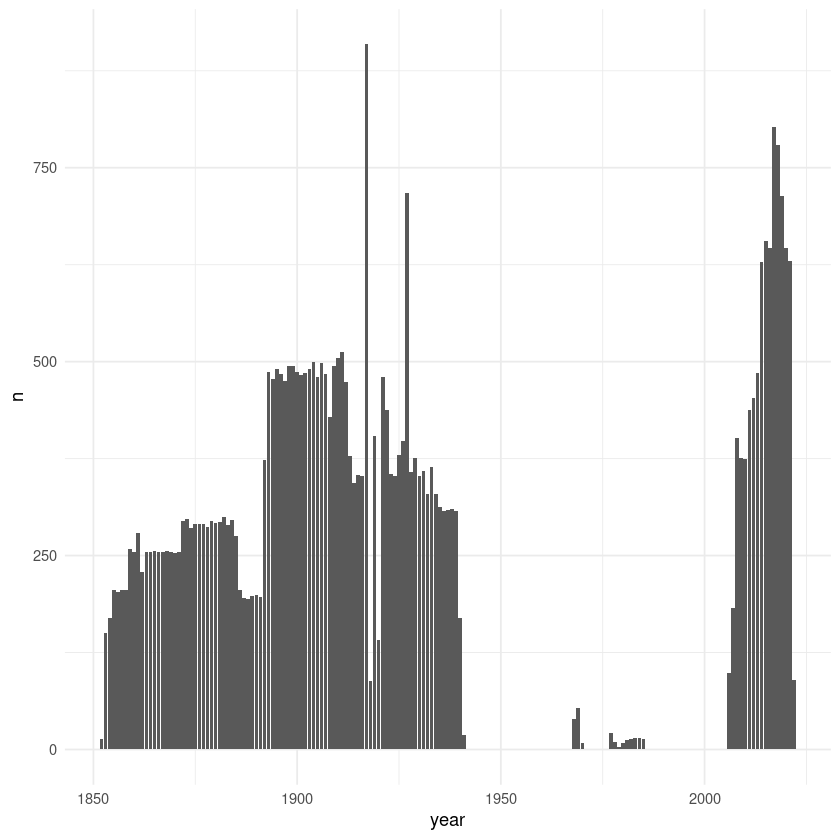

In [14]:
all_issues %>%
    filter(language == "Russian") %>% 
    group_by(year) %>% 
    count() %>% 
    ggplot(aes(x = year, y = n)) + geom_col() + theme_minimal()

In [7]:
subset <- all_issues %>% 
    filter(language == "Russian")

In [102]:
# readr::write_tsv(subset, "test/all_issues_rus.tsv")

#### get_subset_meta()

Subsetting metadata for newspapers in Russian for pages and sections.  


##### Sections

In [8]:
# choice is eiter source="sections" (default) or source="pages"

subset_meta <- get_subset_meta(subset, source = "sections")

Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpznmfDu/file9267c56fd36' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpznmfDu/file9267737d05ca' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpznmfDu/file9267483b9522' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpznmfDu/file92672e4c41c8' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpznmfDu/file92673e700a1a' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpznmfDu/file9267559fd15f' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpznmfDu/file9267760d73a7' has size 0. Returning a NULL data.table.”


In [9]:
str(subset_meta)
# 17 columns describing sections

Classes ‘data.table’ and 'data.frame':	519990 obs. of  17 variables:
 $ .id                               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ docid                             : chr  "AKgorizonty201701" "AKgorizonty201701" "AKgorizonty201701" "AKgorizonty201701" ...
 $ LogicalSectionFirstPageID         : chr  "AKgorizonty201701.1.1" "AKgorizonty201701.1.2" "AKgorizonty201701.1.2" "AKgorizonty201701.1.3" ...
 $ LogicalSectionID                  : chr  "AKgorizonty201701.2.1" "AKgorizonty201701.2.2" "AKgorizonty201701.2.2.1" "AKgorizonty201701.2.3" ...
 $ attrs                             : int  1 2 4 5 6 7 8 9 11 12 ...
 $ LogicalSectionTitle               : chr  "Обложка" "Ненумерованная стр. Объявления" "Ненумерованная стр. Объявление 1" "Заголовок" ...
 $ LogicalSectionType                : chr  "COVER_SECTION+ILLUSTRATION" "GROUPING_NODE" "ADVERTISEMENT" "TITLE_SECTION+ILLUSTRATION" ...
 $ LogicalSectionViewURL             : chr  "/cgi-bin/dea?a=d&d=AKgorizonty201701.2.1" "/cgi-bin/de

In [19]:
min(subset_meta$year)
max(subset_meta$year)

[1] 1852

[1] 2021

In [20]:
subset_meta %>% 
    filter(year == 1852) %>% 
    head()

.id,docid,LogicalSectionFirstPageID,LogicalSectionID,attrs,LogicalSectionTitle,LogicalSectionType,LogicalSectionViewURL,LogicalSectionTextWordCount,LogicalSectionPrevLogicalSectionID,LogicalSectionNextLogicalSectionID,PageOCRAccuracy,MeanOCRAccuracyVol,date,dateraw,year,decade
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<date>,<int>,<int>,<int>
56,livzeitung18521101,livzeitung18521101.1.1,livzeitung18521101.2.1,1,Kopfleiste,TITLE_SECTION+ILLUSTRATION,/cgi-bin/dea?a=d&d=livzeitung18521101.2.1,86,,livzeitung18521101.2.2,66%,74.6,1852-11-01,18521101,1852,1850
56,livzeitung18521101,livzeitung18521101.1.1,livzeitung18521101.2.2,2,Отдель первый.,ARTICLE,/cgi-bin/dea?a=d&d=livzeitung18521101.2.2,313,livzeitung18521101.2.1,livzeitung18521101.2.3,66%,74.6,1852-11-01,18521101,1852,1850
56,livzeitung18521101,livzeitung18521101.1.1,livzeitung18521101.2.3,3,Erste Abtheilung.,ARTICLE,/cgi-bin/dea?a=d&d=livzeitung18521101.2.3,328,livzeitung18521101.2.2,livzeitung18521101.2.4,66%,74.6,1852-11-01,18521101,1852,1850
56,livzeitung18521101,livzeitung18521101.1.3,livzeitung18521101.2.4,4,0тделъ второй. Zweite Abtheilung.,SECTION,/cgi-bin/dea?a=d&d=livzeitung18521101.2.4,5,livzeitung18521101.2.3,livzeitung18521101.2.4.1,83.4%,74.6,1852-11-01,18521101,1852,1850
56,livzeitung18521101,livzeitung18521101.1.3,livzeitung18521101.2.4.1,6,Часть оффициальная.,ARTICLE,/cgi-bin/dea?a=d&d=livzeitung18521101.2.4.1,621,livzeitung18521101.2.4,livzeitung18521101.2.4.2,83.4%,74.6,1852-11-01,18521101,1852,1850
56,livzeitung18521101,livzeitung18521101.1.3,livzeitung18521101.2.4.2,7,Officieller Theil.,ARTICLE,/cgi-bin/dea?a=d&d=livzeitung18521101.2.4.2,1548,livzeitung18521101.2.4.1,livzeitung18521101.2.5,83.4%,74.6,1852-11-01,18521101,1852,1850


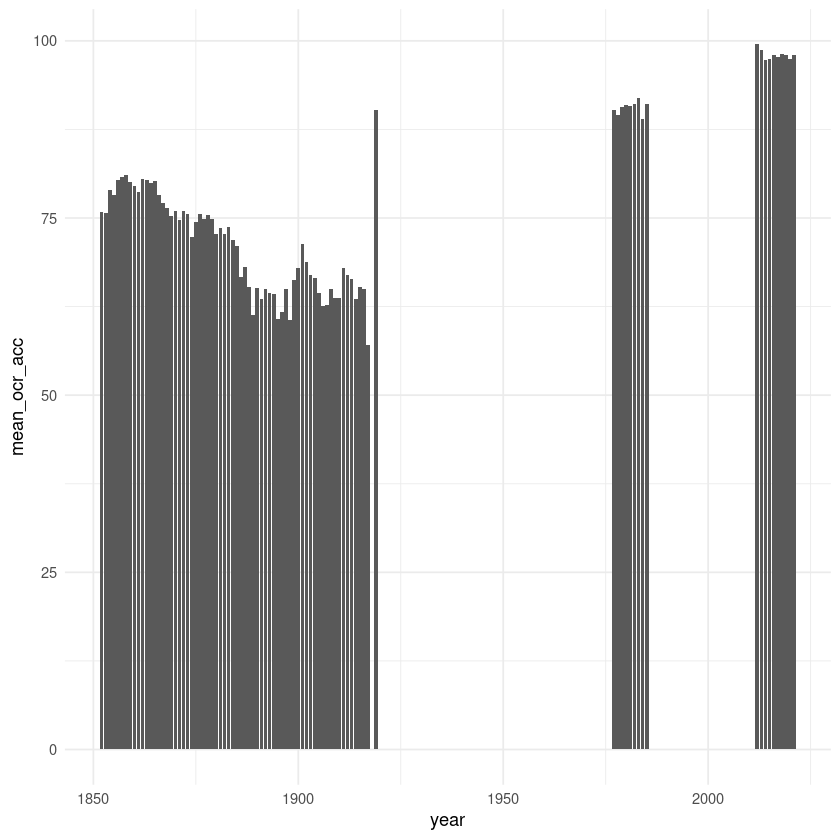

In [21]:
subset_meta %>% 
    group_by(year) %>% 
    summarise(mean_ocr_acc = mean(MeanOCRAccuracyVol)) %>% 
    ggplot(aes(x = year, y = mean_ocr_acc)) + geom_col() + theme_minimal()

In [19]:
# str(subset_meta) # output from 08/04

Classes ‘data.table’ and 'data.frame':	483900 obs. of  17 variables:
 $ .id                               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ docid                             : chr  "AKgorizonty201701" "AKgorizonty201701" "AKgorizonty201701" "AKgorizonty201701" ...
 $ LogicalSectionFirstPageID         : chr  "AKgorizonty201701.1.1" "AKgorizonty201701.1.2" "AKgorizonty201701.1.2" "AKgorizonty201701.1.3" ...
 $ LogicalSectionID                  : chr  "AKgorizonty201701.2.1" "AKgorizonty201701.2.2" "AKgorizonty201701.2.2.1" "AKgorizonty201701.2.3" ...
 $ attrs                             : int  1 2 4 5 6 7 8 9 11 12 ...
 $ LogicalSectionTitle               : chr  "Обложка" "Ненумерованная стр. Объявления" "Ненумерованная стр. Объявление 1" "Заголовок" ...
 $ LogicalSectionType                : chr  "COVER_SECTION+ILLUSTRATION" "GROUPING_NODE" "ADVERTISEMENT" "TITLE_SECTION+ILLUSTRATION" ...
 $ LogicalSectionViewURL             : chr  "/cgi-bin/dea?a=d&d=AKgorizonty201701.2.1" "/cgi-bin/de

##### Pages metadata

In [22]:
subset_meta_pages <- get_subset_meta(subset, source = "pages")

Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpznmfDu/file92674fa1f31a' has size 0. Returning a NULL data.table.”


In [23]:
str(subset_meta_pages)

Classes ‘data.table’ and 'data.frame':	279338 obs. of  18 variables:
 $ .id                       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ docid                     : chr  "AKgorizonty201701" "AKgorizonty201701" "AKgorizonty201701" "AKgorizonty201701" ...
 $ PageID                    : chr  "AKgorizonty201701.1.1" "AKgorizonty201701.1.2" "AKgorizonty201701.1.3" "AKgorizonty201701.1.4" ...
 $ attrs                     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ PageImageHeight           : int  3308 3308 3308 3308 3308 3308 3308 3308 3308 3308 ...
 $ PageImageWidth            : int  2481 2481 2481 2481 2481 2481 2481 2481 2481 2481 ...
 $ PageOCRAccuracy           : chr  "97.9%" "100%" "99.8%" "99.7%" ...
 $ PageTitle                 : chr  "Обложка" "Ненумерованная стр." "Страница 1" "Страница 2" ...
 $ MeanOCRAccuracyVol        : num  99.3 99.3 99.3 99.3 99.3 99.3 99.3 99.3 99.3 99.3 ...
 $ PageViewURL               : chr  "/cgi-bin/dea?a=d&d=AKgorizonty201701.1.1" "/cgi-bin/dea?a=d&d=AKgorizonty20170

In [22]:
# str(subset_meta_pages) # output from 08/04

Classes ‘data.table’ and 'data.frame':	257015 obs. of  18 variables:
 $ .id                       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ docid                     : chr  "AKgorizonty201701" "AKgorizonty201701" "AKgorizonty201701" "AKgorizonty201701" ...
 $ PageID                    : chr  "AKgorizonty201701.1.1" "AKgorizonty201701.1.2" "AKgorizonty201701.1.3" "AKgorizonty201701.1.4" ...
 $ attrs                     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ PageImageHeight           : int  3308 3308 3308 3308 3308 3308 3308 3308 3308 3308 ...
 $ PageImageWidth            : int  2481 2481 2481 2481 2481 2481 2481 2481 2481 2481 ...
 $ PageOCRAccuracy           : chr  "97.9%" "100%" "99.8%" "99.7%" ...
 $ PageTitle                 : chr  "Обложка" "Ненумерованная стр." "Страница 1" "Страница 2" ...
 $ MeanOCRAccuracyVol        : num  99.3 99.3 99.3 99.3 99.3 99.3 99.3 99.3 99.3 99.3 ...
 $ PageViewURL               : chr  "/cgi-bin/dea?a=d&d=AKgorizonty201701.1.1" "/cgi-bin/dea?a=d&d=AKgorizonty20170

In [25]:
readr::write_tsv(subset_meta, "test/meta_rus_subset_sections.tsv")

In [26]:
readr::write_tsv(subset_meta_pages, "test/meta_rus_subset_pages.tsv")

### get_matching_texts test

In [36]:
str(subset) # subset with language == 'Russian'

Classes ‘data.table’ and 'data.frame':	38739 obs. of  60 variables:
 $ DocumentID           : chr  "AKgorizonty201701" "AKgorizonty201801" "AKgorizonty201901" "AKgorizonty202001" ...
 $ keyid                : chr  "AKgorizonty" "AKgorizonty" "AKgorizonty" "AKgorizonty" ...
 $ attrs                : int  1 2 3 4 5 1 1 2 3 4 ...
 $ DocumentDate         : chr  "jaanuar 2017" "jaanuar 2018" "jaanuar 2019" "jaanuar 2020" ...
 $ DocumentTitle        : chr  "Горизонты Эстонии : человек, природа, наука" "Горизонты Эстонии : человек, природа, наука" "Горизонты Эстонии : человек, природа, наука" "Горизонты Эстонии : человек, природа, наука" ...
 $ DocumentType         : chr  "PERIODICAL" "PERIODICAL" "PERIODICAL" "PERIODICAL" ...
 $ series               : chr  "staging/all_pubs/all_vols_AKgorizonty.xml" "staging/all_pubs/all_vols_AKgorizonty.xml" "staging/all_pubs/all_vols_AKgorizonty.xml" "staging/all_pubs/all_vols_AKgorizonty.xml" ...
 $ DocumentNumber       : chr  "1" "1" "1" "1" ...
 $ Docum

In [37]:
# test subset for 10 sections from a Russian journal of 1852
# for some reasons get_subset_meta doesn't provide with zip-paths for texts download
# the subset for get_matching_files() should be the subset got from get_digar_overview()

test_tb <- subset[subset$year == 1852, ][1:10]
str(test_tb)

Classes ‘data.table’ and 'data.frame':	10 obs. of  60 variables:
 $ DocumentID           : chr  "livzeitung18521101" "livzeitung18521108" "livzeitung18521112" "livzeitung18521115" ...
 $ keyid                : chr  "livzeitung" "livzeitung" "livzeitung" "livzeitung" ...
 $ attrs                : int  1 2 3 4 5 6 7 8 9 10
 $ DocumentDate         : chr  "1 november 1852" "8 november 1852" "12 november 1852" "15 november 1852" ...
 $ DocumentTitle        : chr  "Лифляндские губернские ведомости = Livländische Gouvernements-Zeitung" "Лифляндские губернские ведомости = Livländische Gouvernements-Zeitung" "Лифляндские губернские ведомости = Livländische Gouvernements-Zeitung" "Лифляндские губернские ведомости = Livländische Gouvernements-Zeitung" ...
 $ DocumentType         : chr  "NEWSPAPER" "NEWSPAPER" "NEWSPAPER" "NEWSPAPER" ...
 $ series               : chr  "staging/all_pubs/all_vols_livzeitung.xml" "staging/all_pubs/all_vols_livzeitung.xml" "staging/all_pubs/all_vols_livzeitung.xml" "s

In [43]:
# get_matching_files(test_tb, outputfile = "test/libzeitung.txt", source = "pages", 
#                   extracttype = "text")

# creates an error bcs of the line 35:
# fileids_w_meta[,inzippath:=paste0(keyid,"/",year,"/",month,"/",id)]
# Error in paste0(keyid, "/", year, "/", month, "/", id): cannot coerce type 'closure' to vector of type 'character'
# there's no 'id' column in the metadata

ERROR: Error in paste0(keyid, "/", year, "/", month, "/", id): cannot coerce type 'closure' to vector of type 'character'
